In [1]:
# generate two moons dataset
from tensorflow import keras 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

### If one of the following package is not installed, write, in a shell terminal : 

`pip install name_of_the_package`

For instance, you will probably install Keras thanks to `pip install tensorflow`, Tensorflow being the package that manage the latest Keras version

# Deep Learning week - Classification Exercise

In this notebook, you will create 2D data that corresponds to two _moons_: each moon corresponds to a given number of samples, each being a 2D input. Each moon, i.e. all the points of the moon, corresponds to a label, `0` or `1`. These moons are more or less noisy, depending on a `noise` parameters, and the corresponding labels cannot be linearly separated. 

Here is an example of such moons : 

![Two moons](moons_example.png)

To separate the moons, you will build your first Neural Network that takes as input the 2D values of each point and outputs a label, `0` or `1`. In this notebook, we will go progressively through different aspects of the neural network architecture and training procedure.

# Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) that creates 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [2]:
### Data generation
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

### Question : Write a `plot_moons` function


The 0 should be colored in red and the 1 should be colors in blue

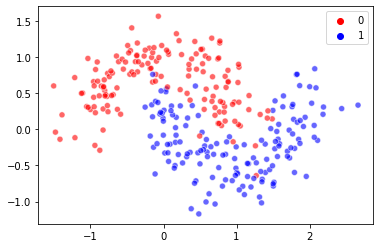

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_moons(X, y):
   ### This function will plot moons 
    return sns.scatterplot(X[:, 0], X[:, 1], hue=y, alpha=0.6, palette = ["red","blue"] )


sns.scatterplot(X[:, 0], X[:, 1], hue=y, alpha=0.6, palette = ["red","blue"] )



  

### Question : Split the initial dataset into a train and test set (size: 70/30%)

Remark : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [4]:
### TO DO 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)


# Initialize the model

Once the data is set, we will initialize your first Neural Network.

In [5]:
def initialize_model():
    
    ### First: `Sequential` informs the model that it will be initialize by "Sequential" model, i.e. a stack of layers 
    ### (These layers are not defined yet)
    model = models.Sequential()
    
    ### Second: The first layer is a fully connected layer (=Dense), i.e. all the outputs of the k-th layer
    ### are considered as inputs of the (k+1)-th layer
    ### The input dimension is the dimention of the input data. The output is of size 500
    model.add(layers.Dense(500, input_dim=2, activation='relu'))
    
    ### Third: The second layer is another fully connected layer. We only give the output_size (being 1) as the
    ### first "Sequential" instructions informed the model about the input size, which is the output size of the 
    ### previous layer. Moreover, the output_size is one because the output of the neural network is a class, 0 or 1.
    ### In fact, it is more than a class : a probabiliy of belonging to class 1, so that it is a continuous output
    ### between 0 and 1. This is why the last activation function is a sigmoid function, whose outputs are always
    ### between 0 and 1.
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Fourth : We defined the parameters that are used to optimize and train the NN.
    ### - the loss corresponds to the measure that the model optimize
    ### - the optimizer actually updates the parameters based on the loss value
    ### - the optional `metrics` argument corresponds to other metrics that are computed along with the loss
    ### For instance, you might use the binary cross-entropy to train, but at the end of the day, you want to 
    ### know how many correctly classified samples you have, i.e. the accuracy
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

In [6]:
model = initialize_model()

### Question : Write `model.summary()`.

This function is **very** useful and important! Be sure to understand what it outputs. You can use it any time to debug what you are doing by making sure the model is doing what you look for.

In [7]:
### TODO
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


### Question : Why is it important to re-initialize the model (by calling the function `initialize_model`) each time you want to run the model, rather than initializing it once and training it for different data (X_train, y_train)?

##### Answer : 

        => ### TO DO 
<hr><hr>

# Fit the model

Reminder : One step of parameter update is "called“ a _backpropagation_ as you _propagate_ a measure of the error back to your network, from the output to the input. It is done by evaluating the prediction on a set of `N` data, called the batch. `N` is thus the batch size. One iteration is when the updates has been made considering all the batches, i.e. it went through all the data once, and only once.

This is an example of the model fitting, with :
- training data (input and output)
- a validation set that corresponds to unused data for training but on which the model compute some estimation to see its generalization
- the epochs, i.e. the number of iterations 
- a batch_size
- verbose: commonly used arguments to output some logs. It usually goes from 0 (no logs) to greated numbers, each being associated to a certain amount of logs.

### Question : Run the following commands with different verbose value and be sure you understand the meaning of the different logs

In [8]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=60, 
                    batch_size=10,
                    verbose=0)

You can check the results on the train set with the following command. The results contains the list of evaluated values that are, first, the loss (here, the binary_crossentropy) and then, the list of metrics that were listed in the `metrics` argument.

In [38]:
results = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {} - Train accuracy (MAE): {}'.format(results[0], results[1]))

Train loss: 0.3144024908542633 - Train accuracy (MAE): 0.8642857074737549


### Question : There are (at least) two important reasons why this accuracy cannot be considered as "good" (idependently of its value), what are they? 

_Hint_ : You can plot the following cell, which plots the loss of the train and validation set (which here is the test set), during the epochs.

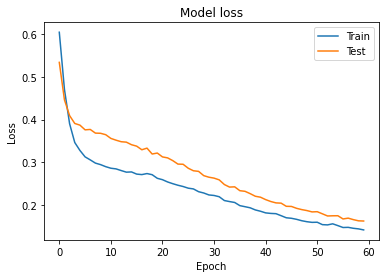

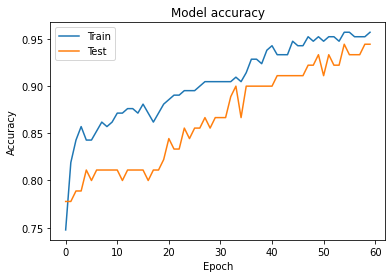

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


##### Answer: 

        => ### TO DO 

### Question Write some `evaluation` to remedy to one of these reasons.

Add more features and/or increase the variance between them. 

### Question : According to the plot, what can you see about the relative positioning of the train and test set? Is this good or bad? How is it related to overfitting, what is its affect and how to remedy it? Could you guess what might be the reason of the overfitting, if any?

##### Answer : 

            => ### TO DO 

<hr><hr>

To prevent the model from overfitting, one of the easy technique is called the Early stopping criterion. It uses a part of the dataset, called the validation set (which is not used to update the model parameters) to check if the loss, on this validation set, is decreasing or not.

The `verbose` argument is made to output some logs during the training. Set to 1, it outputs the iteration it stops as.


In [11]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [12]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=400, 
                    batch_size=25,
                    verbose=0, 
                    callbacks=[es])


Epoch 00023: early stopping


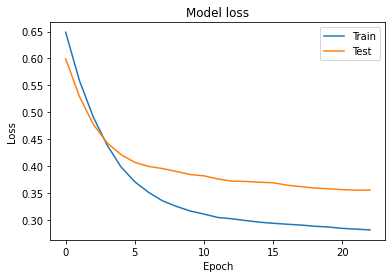

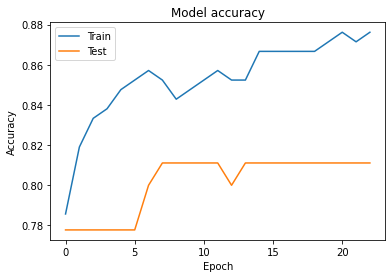

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()



### Question : Why is it not a good idea to stop at the first iteration that is not improving anymore?

###### Answer : 


            => ### TO DO 

<hr><hr>

`EarlyStopping` has the `patience` argument which corresponds to the number of non-decreasing iterations that the algorithm waits until stopping the algorithm.

### Question : Run the algorithm with a patience number between 30 and 50 and comment your findings

Epoch 00373: early stopping
Train loss: 0.10152629762887955 - Train accuracy (MAE): 0.9571428298950195


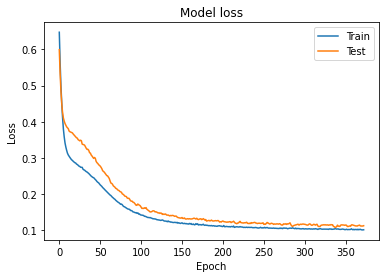

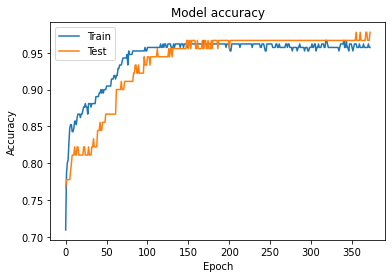

In [14]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=35)


model = initialize_model()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=400, 
                    batch_size=25,
                    verbose=0, 
                    callbacks=[es])

results = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {} - Train accuracy (MAE): {}'.format(results[0], results[1]))

#len(history.history['loss'])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

### Question : Is this correct to report the final loss and accuracy based on the validation set? If yes, explain why? If no, what should you do?


<hr>
Take some time before reading the answer
<hr>
<hr>




##### Answer : 

No, it is not correct because the validation set has been used to score the algorithm. Let's take the example of a validation set that has been biased during the split. Therefore, the whole algorithm is biased towards the data in this validation set.

To this end, the result should be reported on another set. Finally, we will have : 
- a train set : used to update the parameters of the NN during the training
- a validation set : used to check if the parameter updates are improving the prediction on a hold-out set
- a test set : used to get a final estimation of the error on an unseen set

### Question : Construct a train, test and validation set

_Hint_ : You can split the initial set into the train and test set, as previously. 
Then, in the `model.fit`, use the argument `validation split` [(See documentation)](https://keras.io/models/sequential/) to split a fraction of the training data to use the Early Criterion on. Then, report the value based on the test set (that should not have been used in the `model.fit`

In [41]:
### TO DO 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 1)

model = initialize_model()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=400, 
                    batch_size=25,
                    verbose=0,validation_split=0.70)


results = model.evaluate(X_train, y_train, verbose=0)
results

[0.20688092708587646, 0.9357143044471741]

### Question : Write a function that, given the input X, the real output y and the predicted output y_pred plots where the wrong predictions are on the moons.

Then, apply it to the previous test set. Print :
- in grey the good prediction
- in red the 0 poorly predicted
- in blue the 1 poorly predicted

_Hints_: 
- you can obtain `y_pred` with the `predict` function of the `model` object.
- `np.round` rounds the probability of `y_pred`.

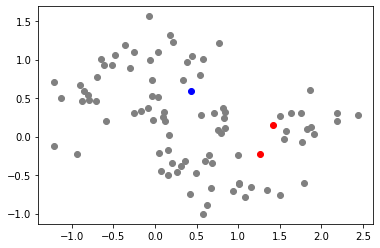

In [24]:
y_pred = model.predict(X_test)

def plot_errors(X, y, y_pred):
    y_pred = np.round(y_pred)
    for i in range(0, len(y)):
        if y_pred[i] == y[i]:
            plt.scatter(X[i,0], X[i,1], c="grey")
        elif y[i] == 0:
            plt.scatter(X[i,0], X[i,1], c= 'red')
        else:
            plt.scatter(X[i,0],X[i,1], c= 'b')

plot_errors(X_test, y_test, y_pred)

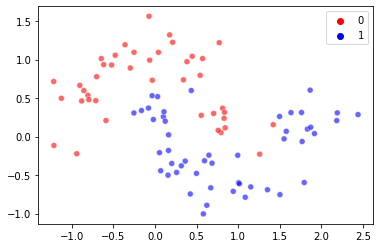

In [26]:
sns.scatterplot(X_test[:, 0], X_test[:, 1], hue=y_test, alpha=0.6, palette = ["red","blue"] )


### Question/Answer/Remark : 

You might say that reporting one test value is not correct as we should do a proper K-fold cross-validation. This is perfectly correct. As the stream within each fold is the same, we consider that you can do the K-fold on your own in a real setting. However, here, training K algorithm each time is too long to be done within the allocated time (For your information, some Facebook/Google Neural networks are trained for weeks on heavy distributed computers).


<hr><hr>

### Question : Write a function that, given data (X,y) simulated thanks to `make_moons` and given a batch_size,   does : 

- split the data into train and test (70%/30%) - deterministic split, no shuffle, as in the first example
- initialize a model
- initialize a early stopping criterion (with `patience = 20`)
- fit the model with a `validation_split=0.7`
- return the loss and accuracy on the test set


In [ ]:
def run_model(X, y, batch_size):    
    ### Data split
    # TO DO
    
    ### Model initialization
    # TO DO
    
    ### Early stopping criterion
    # TO DO
    
    ### Fitting the model 
    # TO DO
    
    ### Evaluating the model
    # TO DO
    
    
    return results

### Question : Write a function `initialize_model_2` 

This function is intended to be exactly the same as the `initialize_model` *EXCEPT* for the `activation` of the first layer that is an argument `act_function` of the function. 


! Warning ! only for the first layer, not the sigmoid which is used to get a probability

In [27]:
def initialize_model_2(act_function):
    
    #### First: initialize a "Sequential" model, i.e. a stack of layers
    ### TO DO 
    model = models.Sequential()
    

    ### Add the layers where the activation is the argument of the function
    ### TO DO 
    model.add(layers.Dense(500, input_dim=2, activation=act_function))
    model.add(layers.Dense(1, activation='sigmoid'))

    ### Compile the model
    ### TO DO 
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model


### Question : Evaluate the final loss with respect to different activation functions

- Create the data, and split them in train and test set
- loop over different activation functions that you can find [here](https://keras.io/activations/)
- `fit` the model for each activation function (use a `validation_split` and an Early Stopping Criterion)
- `evaluate` the score (`loss` and `accuracy` on the unseen test set)
- report the values into a graph

Epoch 00041: early stopping
Train loss: 0.34137704968452454 - Train accuracy (MAE): 0.8571428656578064
Epoch 00152: early stopping
Train loss: 0.33823859691619873 - Train accuracy (MAE): 0.8500000238418579
Train loss: 0.3711474537849426 - Train accuracy (MAE): 0.8535714149475098
Epoch 00064: early stopping
Train loss: 0.3315393328666687 - Train accuracy (MAE): 0.8535714149475098
Epoch 00086: early stopping
Train loss: 0.34544894099235535 - Train accuracy (MAE): 0.8500000238418579
Epoch 00081: early stopping
Train loss: 0.3292439579963684 - Train accuracy (MAE): 0.8535714149475098


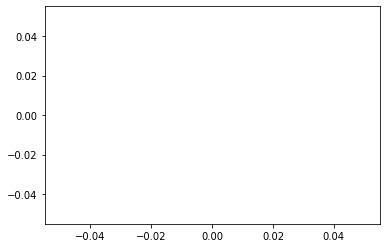

In [57]:
X, y = make_moons(n_samples=400, noise=0.25)

n_train = int(0.7*len(X))
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

results = []


### Model initialization
for act in ['relu', 'sigmoid', 'softmax', 'linear', 'exponential', 'tanh']:
    ### Initialize the model
    ### TO DO 
    model = initialize_model_2(act) 
    
    ### Early stopping criterion
    ### TO DO 
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

    ### Fitting the model 
    ### TO DO 
    
    history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=400, 
                    batch_size=20,
                    verbose=0,validation_split=0.70, callbacks=es)

    ### Evaluate the model
    ### TO DO 
    results_2 = model.evaluate(X_train, y_train, verbose=0)
    results_2
    print('Train loss: {} - Train accuracy (MAE): {}'.format(results_2[0], results_2[1]))
    plt.plot(results)
#     loss_train = history.history[results[0]]
#     loss_val = history.history[results[1]]
#     plt.plot(loss_train, 'g', label='Training loss')
#     plt.plot(loss_val, 'b', label='validation loss')
#     plt.title('Training and Validation loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()
    

In [55]:
results

### TO DO 

[0.30376067757606506, 0.8678571581840515]

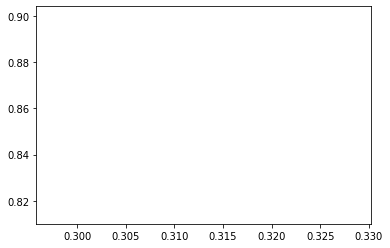

In [47]:
plt.plot(results[0], results[1])
plt.show()
